In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

num_classes = 10

img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
# changing y labels from a scalar to a one hot encoder representation


y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [3]:
# Our base model 

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

BatchNormalization(axis=-1)
model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
# Fully connected layer

BatchNormalization()
model.add(Dense(512))
model.add(Activation('relu'))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(10))


model.add(Activation('softmax'))
print(model.summary())

W0704 13:50:42.381972 140095235344256 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0704 13:50:42.406879 140095235344256 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0704 13:50:42.412402 140095235344256 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0704 13:50:42.439077 140095235344256 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0704 13:50:42.485765 140095235344256 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_3 (Activation)    (None, 10, 10, 64)        0         
__________

In [4]:



model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])


# data augmentation with spacial modifications
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

train_generator = gen.flow(x_train, y_train, batch_size=64)
test_generator = test_gen.flow(x_test, y_test, batch_size=64)

W0704 13:50:46.874651 140095235344256 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0704 13:50:46.882251 140095235344256 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [5]:

model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=5, 
                    validation_data=test_generator, validation_steps=10000//64)

W0704 13:50:49.553035 140095235344256 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/5
937/937 [==============================] - 21s 23ms/step - loss: 0.1991 - acc: 0.9364 - val_loss: 0.0303 - val_acc: 0.9904
Epoch 2/5
937/937 [==============================] - 18s 19ms/step - loss: 0.0623 - acc: 0.9809 - val_loss: 0.0200 - val_acc: 0.9924
Epoch 3/5
937/937 [==============================] - 18s 19ms/step - loss: 0.0456 - acc: 0.9862 - val_loss: 0.0225 - val_acc: 0.9918
Epoch 4/5
937/937 [==============================] - 18s 19ms/step - loss: 0.0427 - acc: 0.9872 - val_loss: 0.0165 - val_acc: 0.9948
Epoch 5/5
937/937 [==============================] - 19s 20ms/step - loss: 0.0338 - acc: 0.9897 - val_loss: 0.0160 - val_acc: 0.9952


In [6]:
# Installing foolbox package (adversarial library)

!pip install foolbox

In [0]:
import foolbox
import keras
import numpy as np
from keras import backend
from keras.models import load_model
from keras.datasets import mnist
from keras.utils import np_utils
from foolbox.attacks import SaliencyMapAttack
from foolbox.criteria import Misclassification
import matplotlib.pyplot as plt

In [8]:
_,(images, labels) = mnist.load_data()
images = images.reshape(10000,28,28,1)
images= images.astype('float32')
images /= 255
images[1].shape
labels.shape

(10000,)

In [0]:
# Function to retrieve the logits (argument to softmax layers) from our model 


def get_softmax_args(X):
    if np.ndim(X)==3:
        X = X.reshape(1,28,28,1)
        x = model.output.op.inputs[-1]
        func = K.function([model.input] + [K.learning_phase()], [x])
        softmax_output = np.array(func([X, 0.]))
    else:
        x = model.output.op.inputs[-1]
        func = K.function([model.input] + [K.learning_phase()], [x])
        softmax_output = np.array(func([X, 0.]))
    return np.squeeze(softmax_output)


# return a vector of shape (number of images * number of attacks, number of outputs(labels))

In [175]:

fmodel = foolbox.models.KerasModel(model, bounds=(0,1)) # creating a foolbox model for an attack via KerasModel

# Setting up a Newton attack with Misclassification criteria (vs targeted attack)
attack=foolbox.attacks.NewtonFoolAttack(fmodel,criterion=Misclassification())

# number of images to attacks
num_sample = 1000

# setting an empty list to retrieve adversarial images.
adv_input = []


# theta correspond to the number of different thetas (magnitude of the pertubation) we want to run the attack with.
# Below, we want 20 different thetas from 0 (no pertubation) to 0.5.
theta = np.linspace(0,.5,20)

# looping across the 20 thetas values:
for i in range (len(theta)):
    
    # looing across the number of images to attack
    for j in range (len(x_test[:num_sample])):
    
        adversarial_all = attack(x_test[j],labels[j],eta=theta[i]) # running the attacks
        
        # if the attack is not effective => return the intial clean image instead
        if np.size(adversarial_all) == 1:
            adversarial_all = x_test[j].reshape(1,28,28,1)
            adv_input.append(adversarial_all)
        else:
        # if the attack is successful return the adversarial images
            adversarial_all = np.array(adversarial_all).reshape(1,28,28,1) # reshaping it for model prediction
 
            adv_input.append(adversarial_all)
    
    
# Note that here we run 20 NewtonFool attacks (one for each thetas) on 1000 images.
# We want a vector of shape (20*1000,28,28,1)

/usr/local/lib/python3.6/dist-packages/foolbox/attacks/base.py:148: UserWarning: NewtonFoolAttack did not find an adversarial, maybe the model or the criterion is not supported by this attack.
  ' attack.'.format(self.name()))
/usr/local/lib/python3.6/dist-packages/foolbox/attacks/base.py:129: UserWarning: Not running the attack because the original input is already misclassified and the adversarial thus has a distance of 0.
  warnings.warn('Not running the attack because the original input'


In [201]:
# Retrieving logits from clean and adversarial samples

samples_advs = np.array(adv_input).reshape(len(adv_input),28,28,1)
args_clean = get_softmax_args(x_test)
args_advs = get_softmax_args(samples_advs)
args_advs.shape

(20000, 10)

In [0]:

# this function calculates the relative differences of logits scores as per the paper :
#The Odds are Odd: A Statistical Test for Detecting Adversarial Examples, Kevin Roth,Yannic Kilcher, Thomas Hofmann.


def advs_latent_diff_new(args_advs):

    adv_reor = args_advs.reshape(len(true_test),len(theta),10)

    diff_advs = []

    #for j in range(10):
    for i in range(len(adv_reor)):
        for k in range (adv_reor.shape[1]):
            for l in range (10):
                diff_advs.append(np.mean(adv_reor[i][k] - adv_reor[i][k][l],axis=-1))
                
    difference_advs = np.array(diff_advs) # we append these scores differences in a numpy array.       
    return difference_advs

In [0]:
# Same as above but for clean examples 

def true_latent_diff_new(args_clean):
    diff_true = [] 
    
    for i in range(len(args_clean)):
        for l in range(10):
            diff_true.append(np.mean(args_clean[i] - args_clean[i][l],axis=-1))
                
    difference_clean = np.array(diff_true)
    return difference_clean

In [178]:

# getting logits differences for clean samples.
true_test = get_softmax_args(x_test[:num_sample])
xtest_diff = true_latent_diff_new(true_test).reshape(num_sample,10)

print(xtest_diff.shape)



# getting logits differences for adversarials samples.
advs_diff = advs_latent_diff_new(args_advs)
resh = np.array(advs_diff).reshape(len(true_test),len(theta),10)
advs_diff_redim = np.mean(resh,axis=1)

print(advs_diff_redim.shape)
print(resh.shape)

(1000, 10)
(1000, 10)
(1000, 20, 10)


In [179]:
# Training a classifier with adversarial logits differences defined above.

from sklearn import svm
rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.fit(advs_diff_redim, labels[:num_sample]) # TRAINED ONLY WITH THE LOGITS DIFERENCES OF THE NEWTOW-FOOL ATTACK

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
# this fonction first calcule the Z_score of the logits difference and then add a condition to define whether it is an adversarial or a clean examples.


def advs_detection_and_correction(testset, threshold):
    from scipy import stats
    from sklearn.metrics import accuracy_score
    cl = []
    L2_dist = []
    for i in range(len(testset)):
        cl.append(np.max(stats.zscore(testset[i]) - threshold)) # Calculate the Z_score stats of the logits differences. 
    index_clean = []
    index_adv = []
    for i in range(len(cl)):
        if cl[i]>=0: 
            index_clean.append(i)#if max Z_score for a particular image is above 0 then it is considered clean and we keep the index in the index_clean list
        else:
            index_adv.append(i)# if not then it is an adversarial examples and we keep the index in index_adv.

    # calculate prediction if input is clean with our initial model.       
    pred_y = model.predict_classes(x_test[index_clean])
    acc_clean = accuracy_score(labels[index_clean],pred_y)
    
    
    # calculate prediction if input is adversarial with our SVM classifier trained on adversarial logits.  
    pred_adv = rbf_svc.predict(testset[index_adv])
    acc_adv = accuracy_score(labels[index_adv],pred_adv)
  
    return acc_clean, acc_adv,len(index_adv),len(index_clean) 

In [0]:
# calculate the accuracy for a mixture of adversarial and clean examples.


def global_accuracy(args_difference):
    acc_clean, acc_pert, n_adv, n_clean = advs_detection_and_correction(args_difference,threshold = 1.054) # need to find the best threshold but 1.054 is good
    
    global_acc = (n_clean/len(args_difference))*acc_clean + (n_adv/len(args_difference))*acc_pert

    return global_acc

In [196]:
print('Accuracy on 100% clean test set is ' + str(global_accuracy(xtest_diff)))

for i in range (resh.shape[1]):
    print('Accuracy on 100% advs test set is ' + str(global_accuracy(resh[:,i,:])))

Accuracy on 100% clean test set is 0.747
Accuracy on 100% advs test set is 0.903
Accuracy on 100% advs test set is 0.883
Accuracy on 100% advs test set is 0.907
Accuracy on 100% advs test set is 0.876
Accuracy on 100% advs test set is 0.9
Accuracy on 100% advs test set is 0.925
Accuracy on 100% advs test set is 0.913
Accuracy on 100% advs test set is 0.903
Accuracy on 100% advs test set is 0.896
Accuracy on 100% advs test set is 0.906
Accuracy on 100% advs test set is 0.887
Accuracy on 100% advs test set is 0.897
Accuracy on 100% advs test set is 0.894
Accuracy on 100% advs test set is 0.919
Accuracy on 100% advs test set is 0.882
Accuracy on 100% advs test set is 0.897
Accuracy on 100% advs test set is 0.909
Accuracy on 100% advs test set is 0.944
Accuracy on 100% advs test set is 0.833
Accuracy on 100% advs test set is 0.935


In [197]:
L2_dist = []
score_adv = []

reshaped_adv = np.array(adv_input).reshape(len(theta)*num_sample,28,28,1)
adv_test = np.zeros((len(theta),num_sample,28,28,1))
for i in range(len(theta)):
    adv_test[i] = reshaped_adv[i*num_sample:(i+1)*num_sample]
    score_adv.append(model.evaluate(adv_test[i], y_test[:num_sample])[1]) # Calculate the accuracy of our model with NO defense.
    L2_dist.append((1/num_sample)*np.sum((adv_test[i] - x_test[:num_sample])**2)) # Calculate the L2 distance.

1000/1000 [==============================] - 0s 68us/step


In [0]:
# Calculate the accuracy of our model WITH the logits detection and correction defense and appending it for plotting.

advs_accuracy = []

for i in range (resh.shape[1]):
    advs_accuracy.append(global_accuracy(resh[:,i,:]))
    
  

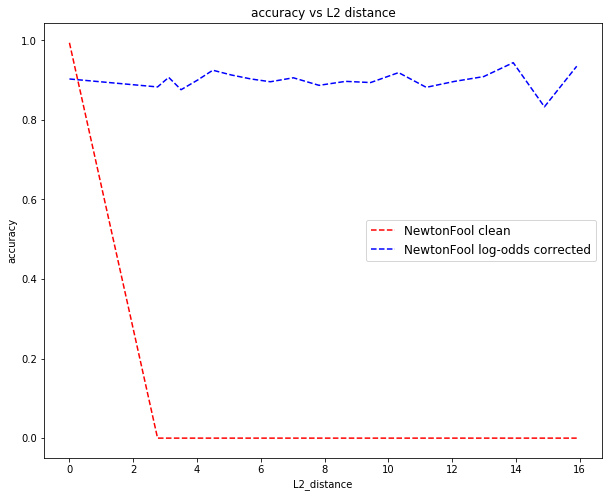

In [199]:
# plotting the two lines for comparison.


fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111)
#plt.plot(L2_dist,score_adv,'--')
ax.plot(L2_dist,score_adv, "r--", label="NewtonFool clean")
ax.plot(L2_dist,advs_accuracy, "b--", label="NewtonFool log-odds corrected")
ax.legend(loc='best',prop={'size': 12})
plt.xlabel('L2_distance')
plt.ylabel('accuracy')
plt.title('accuracy vs L2 distance')

plt.show()